In [1]:
import pandas as pd
import numpy as np
import cvxpy
from oracles import Oracle
from optimization import *
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('stocks_data_year.csv', index_col=0)
data = data[1:-1]
data = data.drop(['CEB.Close', 'FNFV.Close', 'TYC.Close'], axis = 1) #to many NA's
data = data.fillna(0)
data.index = pd.to_datetime(data.index)
#Divide by quaters
data = np.array(data.groupby([data.index.quarter,data.index.year], sort=False))

In [3]:
lambd = 0.002
rho = 10
n = data[0,1].shape[1]
x0 = np.random.rand(n)
q = data[:,0].shape[0] #num of quaters

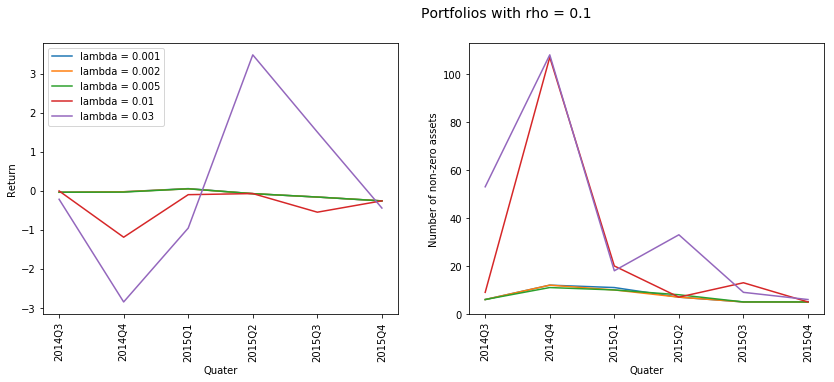

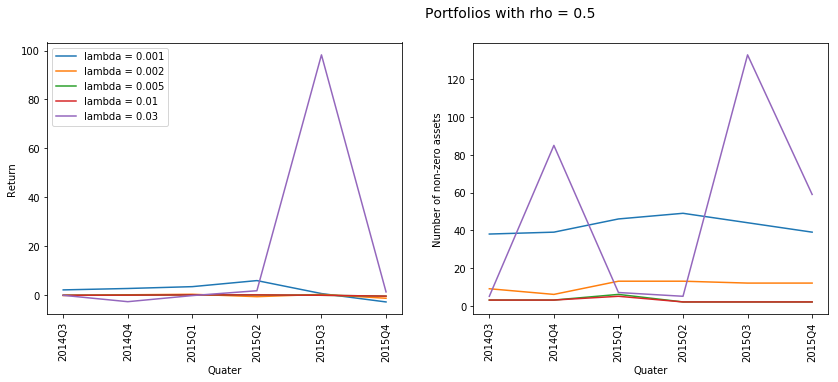

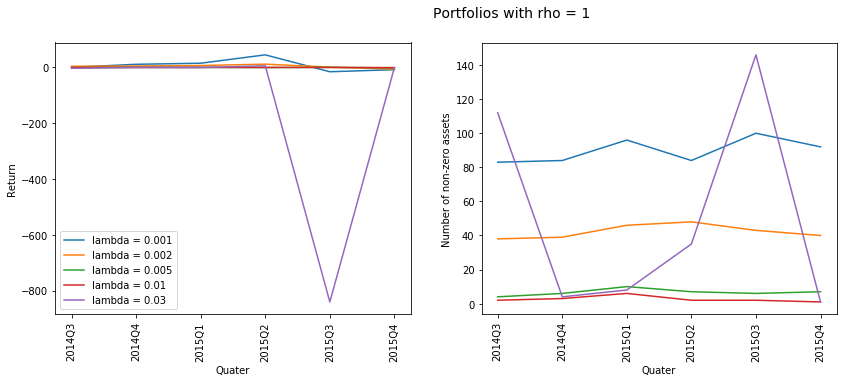

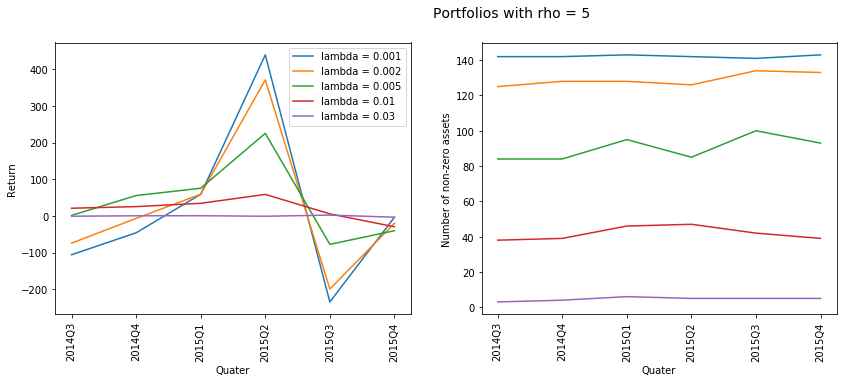

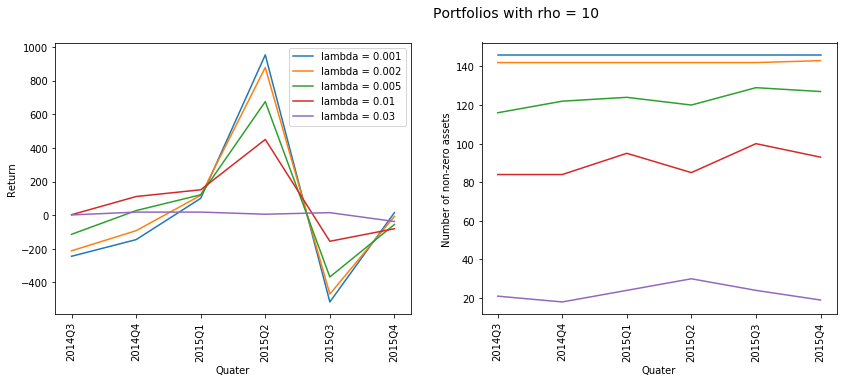

In [11]:
Q = ['2014Q3', '2014Q4', '2015Q1', '2015Q2' ,'2015Q3', '2015Q4']
for ro in [0.1, 0.5, 1, 5, 10]:
    rho = ro
    fig, axes = plt.subplots(ncols=2, figsize=(14, 5))
    
    fig.text(0.5, 0.95,'Portfolios with rho = {}'.format(rho), size = 14)
    ax1 = axes[0]
    ax1.set_xlabel('Quater')
    ax1.set_ylabel('Return')
    ax1.set_xticks(range(6))
    ax1.set_xticklabels(Q, rotation='vertical')

    ax2 = axes[1]
    ax2.set_xlabel('Quater')
    ax2.set_ylabel('Number of non-zero assets')
    ax2.set_xticks(range(6))
    ax2.set_xticklabels(Q, rotation='vertical')
    
    for lbd in [0.001, 0.002, 0.005, 0.01, 0.03]:
        
        lambd = lbd
        total_return = []
        non_zero = []
        for i in range(q-1): 
            Sigma = np.cov(data[i,1].values.astype(float).T) + 1e-5*np.eye(n)
            r = np.mean(data[i,1], axis = 0).values
            oracle = Oracle(Sigma, r, lambd, rho, mode='efficient')
            x_k = FISTA(oracle, x_0 = np.zeros(len(r)), trace=False)[0]
    
            current_portfolio = x_k

            quater_return = np.prod(data[i+1,1].values + 1, axis=0) - 1
            total_return.append((quater_return @ current_portfolio))
            non_zero.append(np.count_nonzero(current_portfolio))
    
        ax1.plot(total_return, label = 'lambda = {}'.format(lambd))
        ax2.plot(non_zero, label = 'lambda = {}'.format(lambd))
        ax1.legend()
